# BikeShare: Did the number of casual users increase in 2012 compared to 2011?

## 1. Aim

Test the hypothesis that the dfference between the mean number of daily casual users of a bike rental company in 2012 and 2011 is equal to zero. 

## 2. Setup the notebook

### 2.1 Import the modules

In [1]:
from __future__ import annotations
from statsmodels.stats.weightstats import CompareMeans
from scipy.stats import norm
from pandas import DataFrame  # for typing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

### 2.2 Import the data

In [2]:
bikes: DataFrame = pd.read_csv("../data/bike_rental_daily.csv")

## 3. Prepare the data

### 3.1 Preview the data

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,dailycount
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 3.2 Select interesting columns

In [4]:
bikes = bikes[["season", "yr", "workingday", "casual"]].copy(False)

### 3.3 Filter data

In [5]:
# filter on non-working day in spring, summer
bikes.query('workingday == 0 & season in [2, 3]', inplace=True)

# drop workingday and season, no longer needed
bikes.drop(columns=["workingday", "season"], inplace=True)

# reset the index
bikes.reset_index(drop=True, inplace=True)

# preview
bikes.head()

,yr,casual
0,0,981
1,0,472
2,0,898
3,0,1651
4,0,879


### 3.4 Replace `yr[0, 1]` with descriptions

In [6]:
bikes["yr"].replace(to_replace={0: "2011", 1:"2012"}, inplace=True)

### 3.5 Get `2011`, `2012` as `DataFrames`

In [7]:
bikes_2011 = bikes.query("yr == '2011'")
bikes_2012 = bikes.query("yr == '2012'")

## 4. Explore the data

### 4.1 Describe the data

In [8]:
bikes_2011.describe().T

,count,mean,std,min,25%,50%,75%,max
casual,56.0,1552.714286,545.715834,121.0,1285.75,1567.5,1880.25,3065.0


In [9]:
bikes_2012.describe().T

,count,mean,std,min,25%,50%,75%,max
casual,57.0,2212.035088,653.451331,120.0,1829.0,2345.0,2622.0,3410.0


### 4.2 Plot the data

#### 4.2.1 Plot as a histogram

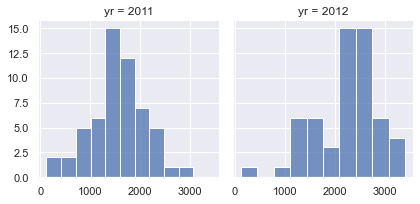

In [15]:
g = sns.FacetGrid(bikes, col="yr")
g.map_dataframe(sns.histplot, x="casual", bins=10)
plt.show()

#### 4.2.2 Plot as boxplots

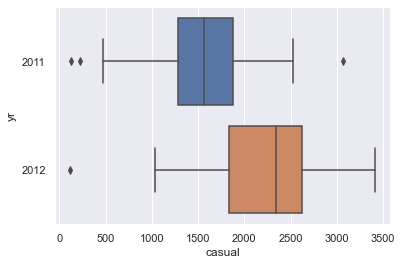

In [11]:
# plot the data
ax = sns.boxplot(
    data=bikes,
    x="casual",
    y="yr")
plt.show()

## 5. Test the samples

In [12]:
diff = CompareMeans.from_data(
    data1=bikes_2012["casual"],
    data2=bikes_2011["casual"])

In [13]:
diff.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,659.3208,113.358,5.816,0.000,437.143,881.498
